![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [163]:
bikes[['season','hour']].describe()

,season,hour
count,10886.000000,10886.000000
mean,2.506614,11.541613
std,1.116174,6.915838
min,1.000000,0.000000
25%,2.000000,6.000000
50%,3.000000,12.000000
75%,4.000000,18.000000
max,4.000000,23.000000


<AxesSubplot:xlabel='hour', ylabel='season'>

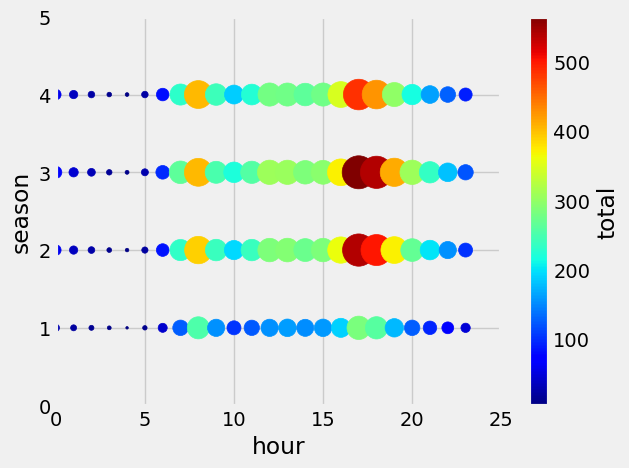

In [184]:
import matplotlib.pyplot as plt
bikes_group = bikes.groupby(by=['season','hour'])['total'].mean()
bikes_group= bikes_group.reset_index()
plt.style.use('fivethirtyeight')
bikes_group.plot(kind='scatter', x='hour', y='season', s='total', c='total', colormap='jet', xlim=(0, 25), ylim=(0, 5))

**Analisis:** se puede observar que la variable a predecir 'total' , que se refiere al total de bicicletas alquiladas difieren depediendo de la hora en que son alquiladas y la estación meteorológicas en la que se encuentre.

Respecto a la Estación se puede observar gráficamente y númericamente que el invierno ('season' = 1) es menor el alquiler de bicicletas, esto puede deberse a la naturaleza del medio del transporte, y el frio que se genera en esta estación. Por el contrario en verano se ve un aumento en el uso de la bicicleta a diferencia del invierno el cual en promedio por hora se utiliza 118 veces mas es decir, el doble del uso que hay en invierno.

En todas las estaciones se observa un pico a las 5 p.m. ('hour' = 17), esto puede deberse a los horarios pico de tráfico donde la bicicleta suele ser una opción más llamativa para evitar el tráfico. el uso del alquiler de bicicletas entre la 1 y las 5 de la mañana suele se muy similar en todas las estaciones, Siendo las 4 de la mañana el horario de menor uso.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

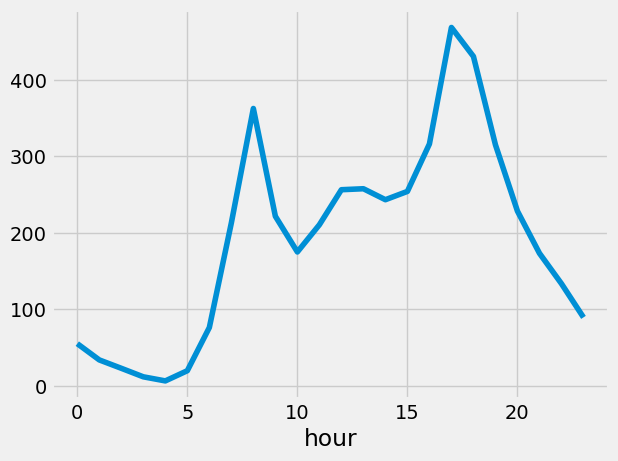

In [185]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

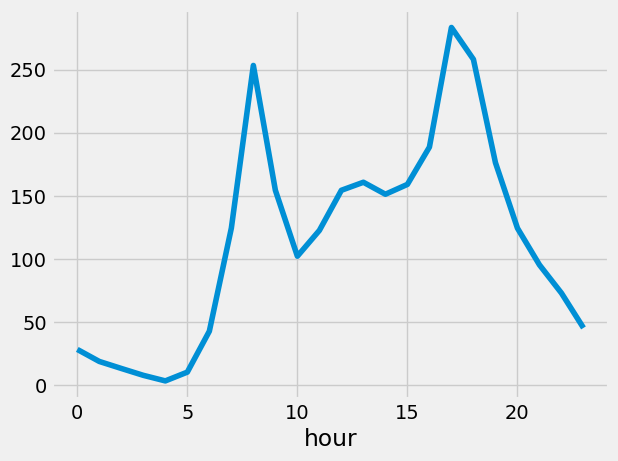

In [186]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes["season"]==1].groupby('hour').total.mean().plot()

**Analisis:** se puede observar que la media del uso de las bicicletas en las estación de invierno, entre las 9 de la noche y las 6 la mañana se observa el horario de menor uso, en contra parte el pico más alto de demanda se ve a las 5 y 6 de la tarde con al rededor de 280  y 260 alquileres en promedio respectivamente, y en la mañana un pico a las 8 de la mañana que alcanza a sobrepasar los 250 alquileres en promedio.

<AxesSubplot:xlabel='hour'>

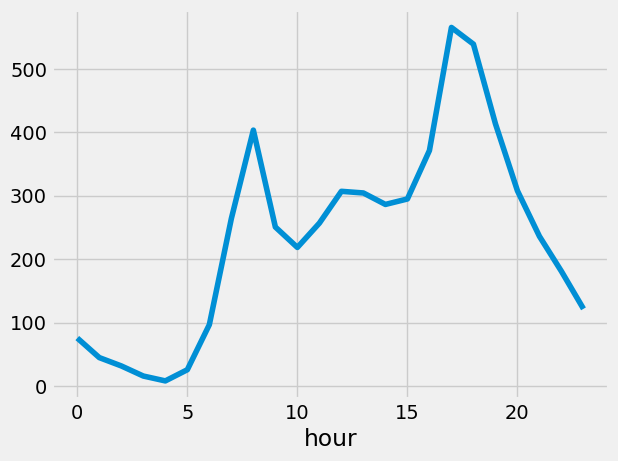

In [187]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes["season"]==3].groupby('hour').total.mean().plot()

**Analisis:** se puede observar que la media del uso de las bicicletas en las estación de verano igual que en invierno es entre las las 9 de la noche y las 6 la mañana se observa el horario de menor uso, en contra parte el pico más alto de demanda se ve a las 5 y 6 de la tarde con al rededor de 560  y 540 alquileres en promedio respectivamente, lo que significa más del doble que en las mismas horas en invierno y en la mañana un pico a las 8 de la mañana que alcanza a sobrepasar los 400 alquileres en promedio, que es un aumento del 60% respecto a la misma hora que en invierno

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [416]:
# Celda 3
# Definimos nuestras variables predictoras y a predecir. 
import statsmodels.api as sm
XTotal = bikes[['season','hour']]
yTotal = bikes['total']
XTotal = pd.get_dummies(XTotal,columns=['season'], drop_first=True)
# Dividimos la muestra en train y test
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)
# Definimos y alimentamos el modelo
import statsmodels.api as sm
linmod = sm.OLS(yTrain,XTrain).fit()
linmod
linmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  total   R-squared (uncentered):                   0.631
Model:                            OLS   Adj. R-squared (uncentered):              0.630
Method:                 Least Squares   F-statistic:                              3112.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):                        0.00
Time:                        23:11:51   Log-Likelihood:                         -47336.
No. Observations:                7293   AIC:                                  9.468e+04
Df Residuals:                    7289   BIC:                                  9.471e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hour          10.2896      0.206     49.932      0.000       9.886      10.694
season_2      95.2380      4.421     21.541      0.000      86.571     103.905
season_3     113.3227      4.407     25.716      0.000     104.684     121.961
season_4      81.5944      4.433     18.407      0.000      72.905      90.284
==============================================================================
Omnibus:                     1591.862   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3248.328
Skew:                           1.294   Prob(JB):                         0.00
Kurtosis:                       4.997   Cond. No.                         39.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [422]:
y_pred = linmod.predict(XTest)
mse_reg_log_i = mean_squared_error(yTest, y_pred)
print("MSE:", mse_reg_log_i)

MSE: 25631.23932841635


**Analisis:** Al implementar una regresión lieal se observa unos coeficientes de aumento que nos da a conocer el comportamiento de los datos respecto a las estaciones, es decir se observa por ejemplo que aumenta en 113 alquileres en verano con respecto a el invierno, pero esto en la realidad no es un efecto tan lienal respecto, ya que vemos por el análisis anterior que el efecto de la estación cambia a lo largo de la hora, ya que aumenta en mayor proporción el uso en verano en horas de la tarde, adicional, **la hora** del día es una variable continua, y no tiene un efecto  lineal en el uso de la bicicleta. ya que según la inferencia realizada por medio de la regresión por hora del día aumenta 10.2 la media. siendo que las horas pico de uso son las 5 de la tarde (17 horas) y en las horas de la noche hay un decrecimiento del uso lo que no contempla el modelo. 

Estamos asumiendo que  entre la estación, la hora del día y el uso de la bicicleta es lineal, lo que en realidad no es verdadero según el análisis descriptivo anteriormente realizado.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [265]:
# Celda 4
feature_cols = ["hour","season"]
XTotal = bikes[["hour","season"]]
yTotal = bikes["total"]
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

In [266]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)    
    return gini_impurity_

def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])    
    best_split = [0, 0, 0]  # j, split, gain    
    # Para todas las varibles 
    for j in features:        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)                        
            if gain > best_split[2]:
                best_split = [j, split, gain]    
    return best_split

def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)    
    # Guardar el árbol y estimar la predicción
    y_pred = y.mean()  
    y_prob = y.mean()     
    tree = dict(y_pred=y_pred,  level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree       
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]
    # Siguiente iteración para cada partición    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)    
    return tree

In [267]:
tree_grow2=tree_grow(XTrain, yTrain, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree_grow(XTrain, yTrain, level=0, min_gain=0.001, max_depth=3, num_pct=10)

{'y_pred': 189.627313862608,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 7293,
 'gain': 18468.385092517958,
 'sl': {'y_pred': 53.85456039441249,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 2434,
  'gain': 6695.472699532862,
  'sl': {'y_pred': 32.450256889304065,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 2141,
   'gain': 602.8207067436908,
   'sl': {'y_pred': 25.25287356321839,
    'level': 3,
    'split': -1,
    'n_samples': 1827,
    'gain': 398.9725847695497},
   'sr': {'y_pred': 74.328025477707,
    'level': 3,
    'split': -1,
    'n_samples': 314,
    'gain': 596.4506420522612}},
  'sr': {'y_pred': 210.259385665529,
   'level': 2,
   'split': [1, 2.0],
   'n_samples': 293,
   'gain': 4671.176444058714,
   'sl': {'y_pred': 124.80281690140845,
    'level': 3,
    'split': -1,
    'n_samples': 71,
    'gain': 0},
   'sr': {'y_pred': 237.5900900900901,
    'level': 3,
    'split': -1,
    'n_samples': 222,
    'gain': 254.56058761462918}}},
 'sr': {'y_pred': 257.6

#### Predicción 

In [268]:
tree = tree_grow(XTrain, yTrain, level=0, min_gain=0.001, max_depth=3, num_pct=10)

In [269]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']            
    else:        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [305]:
y_pred= tree_predict(XTest,tree)
from sklearn.metrics import mean_squared_error

mse_manual = mean_squared_error(yTest, y_pred)
mse_manual

17583.22315243755

El mse del árbol manual es de 17.583 

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [312]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 30)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
mse_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    mse_scores.append((cross_val_score(clf, XTrain, yTrain, cv=10, scoring='neg_mean_squared_error').mean())*-1)

Text(0, 0.5, 'mse_scores')

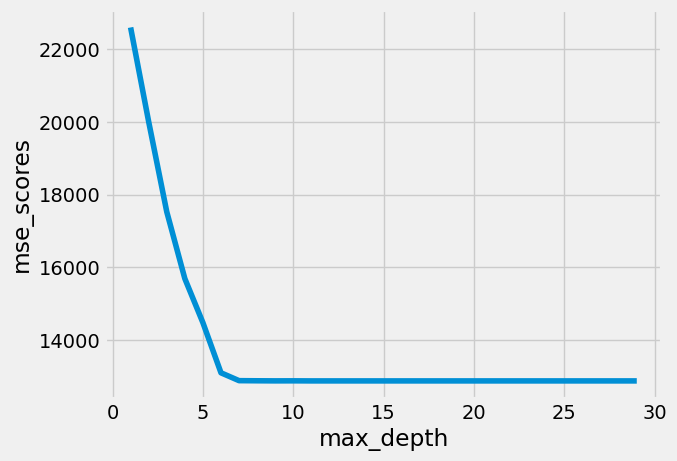

In [313]:
import matplotlib.pyplot as plt

plt.plot(max_depth_range, mse_scores)
plt.xlabel('max_depth')
plt.ylabel('mse_scores')

In [314]:
XTest = XTest[["hour","season"]]
XTest.shape

(3593, 2)

In [323]:
clf = DecisionTreeClassifier(max_depth=7)
clf2= clf.fit(XTrain,yTrain)
y_pred = clf2.predict(XTest)

In [324]:
mse_slk = mean_squared_error(yTest, y_pred)
print('Mse:', mse_slk)

Mse: 23749.884775953244


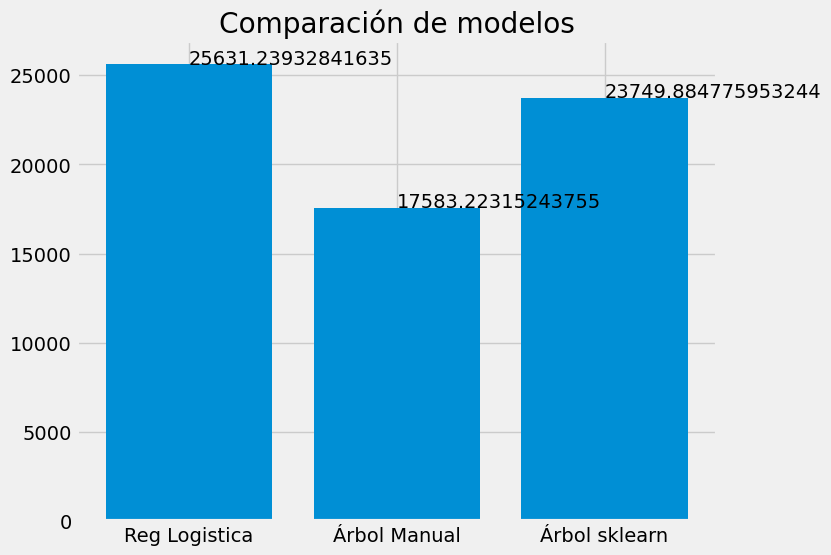

In [423]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['Reg Logistica','Árbol Manual','Árbol sklearn']
ejeY = [mse_reg_log_i,mse_manual,mse_slk]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

**Analisis** Comparando el árbol manual con el modelo de sklearn tiene mejor MSE el árbol manual, hay que buscar otros hiperparametros diferentes u otra técnica para la optimización, que permita por medio de sklearn mejorar el MSE. 

El modelo de peor desempeño es la regresión Logística. 

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [326]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [327]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [328]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

Text(0, 0.5, 'accuracy_scores')

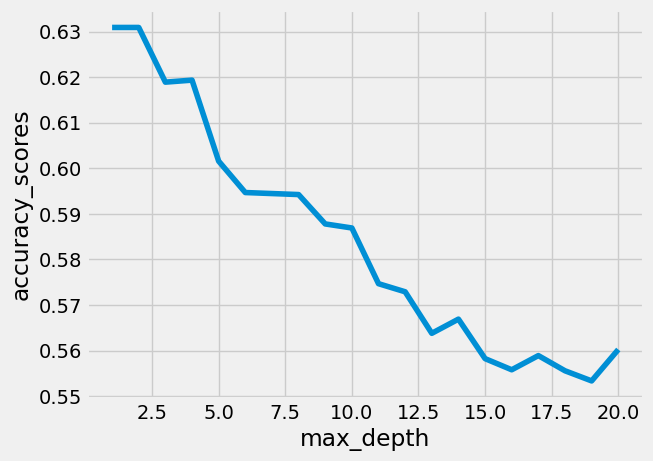

In [424]:
# Celda 6

## Arbol de Decisión 

max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de **máxima profundidad** (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf_arbol = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf_arbol, X_train, y_train, cv=10, scoring='accuracy').mean())

import matplotlib.pyplot as plt

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy_scores')

Mayor accuracy se alcanza con una profundidad máxima del árbol de 2, y es el parametro que se optimiza.

In [358]:
clf_arbol1 =  DecisionTreeClassifier(max_depth=2, random_state=1)
clf_arbol1 = clf_arbol.fit(X_train, y_train)

In [359]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred = clf_arbol1.predict(X_test)
accuracy__arbol1 = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy__arbol1)

f_score__arbol1 = f1_score(y_test, y_pred, average='weighted')
print('F-score:', f_score__arbol1)

Accuracy: 0.5333333333333333
F-score: 0.5333333333333333


In [360]:
## Regresión Logística
from sklearn.linear_model import LogisticRegression
clf_reg_log = LogisticRegression(random_state=0).fit(X_train, y_train)
clf_reg_log = clf_reg_log.fit(X_train, y_train)

In [361]:
y_pred = clf_reg_log.predict(X_test)
accuracy_reg_log = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_reg_log)
f_score_reg_log = f1_score(y_test, y_pred, average='weighted')
print('F-score:', f_score_reg_log)

Accuracy: 0.6146666666666667
F-score: 0.6146043228654585


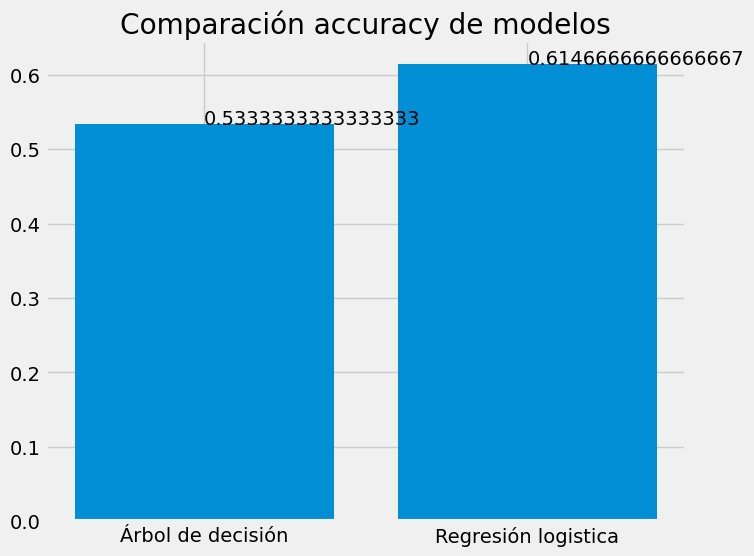

In [362]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación accuracy de modelos")
ejeX = ['Árbol de decisión','Regresión logistica']
ejeY = [accuracy__arbol1,accuracy_reg_log]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

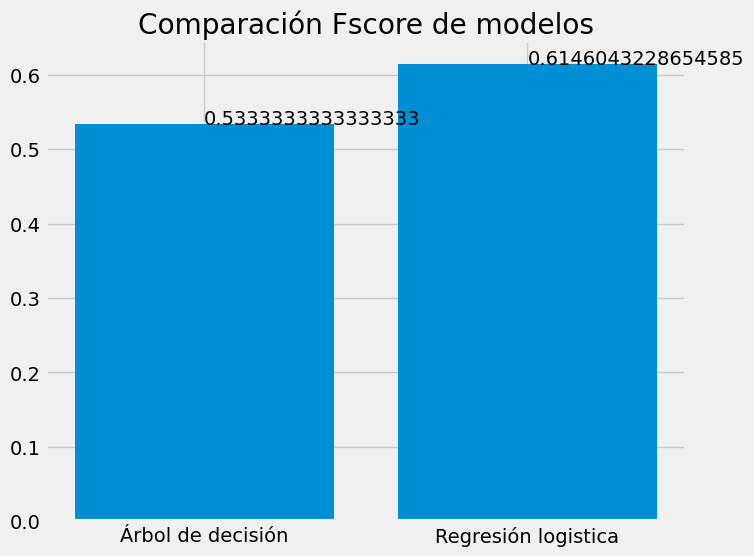

In [363]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación Fscore de modelos")
ejeX = ['Árbol de decisión','Regresión logistica']
ejeY = [f_score__arbol1,f_score_reg_log]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

**Análisis** En cuanto al Fscore y el accuracy de los modelos se observa que la regresión logistica tiene mejor desempeño que el árbol de decisión para este modelo de clasificación.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [426]:
# Celda 7
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

max_depth = 5
arbol = DecisionTreeClassifier(max_depth=max_depth)
clf_arbol_max_depth = BaggingClassifier(base_estimator=arbol, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf_arbol_max_depth.fit(X_train, y_train)
y_pred_arbol_max_depth = clf_arbol_max_depth.predict(X_test)

f1_pred_arbol_max_depth = metrics.f1_score(y_pred_arbol_max_depth, y_test)
accuracy_pred_arbol_max_depth = metrics.accuracy_score(y_pred_arbol_max_depth, y_test)

metrics.f1_score(y_pred_arbol_max_depth, y_test), metrics.accuracy_score(y_pred_arbol_max_depth, y_test)

(0.6573333333333333, 0.6573333333333333)

In [427]:
min_samples_leaf = 5
arbol = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
clf_arbol_min_samples_leaf = BaggingClassifier(base_estimator=arbol, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf_arbol_min_samples_leaf.fit(X_train, y_train)
y_pred_arbol_min_samples_leaf = clf_arbol_min_samples_leaf.predict(X_test)

f1_pred_arbol_min_samples_leaf = metrics.f1_score(y_pred_arbol_min_samples_leaf, y_test)
accuracy_pred_arbol_min_samples_leaf = metrics.accuracy_score(y_pred_arbol_min_samples_leaf, y_test)

metrics.f1_score(y_pred_arbol_min_samples_leaf, y_test), metrics.accuracy_score(y_pred_arbol_min_samples_leaf, y_test)

(0.6582947785855915, 0.6553333333333333)

In [428]:
reg_log = LogisticRegression()
clf_reg_log = BaggingClassifier(base_estimator=reg_log, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf_reg_log.fit(X_train, y_train)
y_pred_reg_log = clf_reg_log.predict(X_test)

f1_pred_reg_log = metrics.f1_score(y_pred_reg_log, y_test)
accuracy_pred_reg_log = metrics.accuracy_score(y_pred_reg_log, y_test)

metrics.f1_score(y_pred_reg_log, y_test), metrics.accuracy_score(y_pred_reg_log, y_test)

(0.6126855600539811, 0.6173333333333333)

In [431]:
#Ensamble de los tres modelos: se crea una votación donde 2 de los 3 modelos den 1 se toma como 1 en el ensamble
sum_ensamble = y_pred_reg_log +y_pred_arbol_min_samples_leaf +y_pred_arbol_max_depth
Ensamble = []
for val in sum_ensamble:
    if val >= 2:
        Ensamble.append(1)
    else:
        Ensamble.append(0)
        
f1_score_ensamble = metrics.f1_score(Ensamble, y_test)
accuracy_score_ensamble = metrics.accuracy_score(Ensamble, y_test)
metrics.f1_score(Ensamble, y_test), metrics.accuracy_score(Ensamble, y_test)

(0.6551264980026632, 0.6546666666666666)

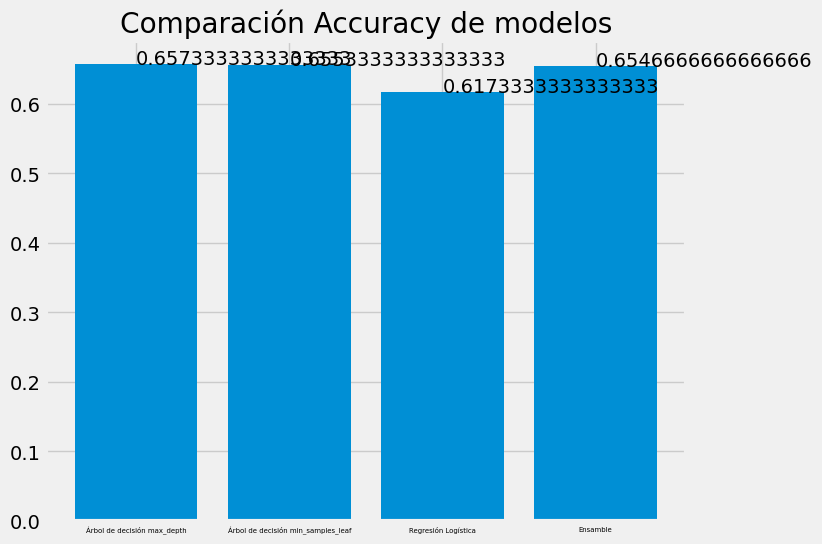

In [432]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación Accuracy de modelos")
ejeX = ['Árbol de decisión max_depth','Árbol de decisión min_samples_leaf','Regresión Logística','Ensamble']
ejeY = [accuracy_pred_arbol_max_depth,accuracy_pred_arbol_min_samples_leaf,accuracy_pred_reg_log,accuracy_score_ensamble]
ax.bar(ejeX,ejeY)
ax.tick_params(axis='x', labelsize=5)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

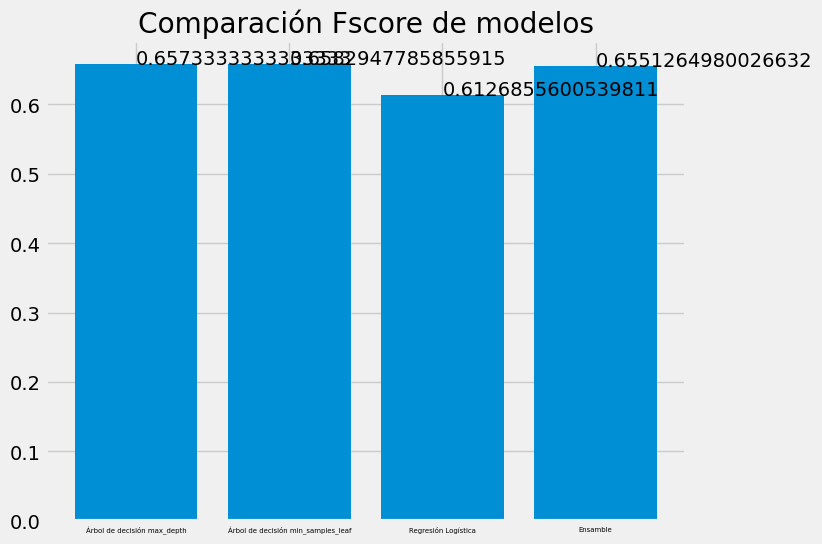

In [433]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación Fscore de modelos")
ejeX = ['Árbol de decisión max_depth','Árbol de decisión min_samples_leaf','Regresión Logística','Ensamble']
ejeY = [f1_pred_arbol_max_depth,f1_pred_arbol_min_samples_leaf,f1_pred_reg_log,f1_score_ensamble]
ax.bar(ejeX,ejeY)
ax.tick_params(axis='x', labelsize=5)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

El modelo con mejor desempeño es el ensamble de arbol de decisión con el parámetro max_depth toma un valor de 5 en el Accuracy, cuando evaluamos el F1-Score se observa que en ensamble de arboles de decisión min_samples_leaf tiene mejor desempeño.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [370]:
# Celda 8

In [434]:
max_depth = 5
arbol = DecisionTreeClassifier(max_depth=max_depth)
clf_arbol_max_depth = BaggingClassifier(base_estimator=arbol, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf_arbol_max_depth.fit(X_train, y_train)
y_pred = clf_arbol_max_depth.predict(X_test)

In [436]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf_arbol_max_depth.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf_arbol_max_depth.n_estimators))

for i in range(clf_arbol_max_depth.n_estimators):
    oob_sample = ~clf_arbol_max_depth.estimators_samples_[i]
    y_pred_ = clf_arbol_max_depth.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf_arbol_max_depth.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_arbol_max_depth2 = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

f1_pred_arbol_max_depth2 = metrics.f1_score(y_pred_arbol_max_depth, y_test)
accuracy_pred_arbol_max_depth2 = metrics.accuracy_score(y_pred_arbol_max_depth, y_test)

# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred_arbol_max_depth2, y_test), metrics.accuracy_score(y_pred_arbol_max_depth2, y_test)

(0.6494915254237288, 0.6553333333333333)

In [437]:
min_samples_leaf = 5
arbol = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
clf_arbol_min_samples_leaf = BaggingClassifier(base_estimator=arbol, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf_arbol_min_samples_leaf.fit(X_train, y_train)
y_pred = clf_arbol_min_samples_leaf.predict(X_test)

In [438]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf_arbol_min_samples_leaf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf_arbol_min_samples_leaf.n_estimators))

for i in range(clf_arbol_min_samples_leaf.n_estimators):
    oob_sample = ~clf_arbol_min_samples_leaf.estimators_samples_[i]
    y_pred_ = clf_arbol_min_samples_leaf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf_arbol_min_samples_leaf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_arbol_min_samples_leaf2 = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)
# Desempeño al hacer votación ponderada

f1_pred_arbol_min_samples_leaf2 = metrics.f1_score(y_pred_arbol_min_samples_leaf2, y_test)
accuracy_pred_arbol_min_samples_leaf2 = metrics.accuracy_score(y_pred_arbol_min_samples_leaf2, y_test)
metrics.f1_score(y_pred_arbol_min_samples_leaf2, y_test), metrics.accuracy_score(y_pred_arbol_min_samples_leaf2, y_test)

(0.6504394861392833, 0.6553333333333333)

In [439]:
reg_log = LogisticRegression()
clf_reg_log = BaggingClassifier(base_estimator=reg_log, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf_reg_log.fit(X_train, y_train)
y_pred = clf_reg_log.predict(X_test)

In [440]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf_reg_log.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf_reg_log.n_estimators))

for i in range(clf_reg_log.n_estimators):
    oob_sample = ~clf_reg_log.estimators_samples_[i]
    y_pred_ = clf_reg_log.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf_reg_log.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_reg_log2 = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)
# Desempeño al hacer votación ponderada

f1_pred_reg_log2 = metrics.f1_score(y_pred_reg_log2, y_test)
accuracy_pred_reg_log2 = metrics.accuracy_score(y_pred_reg_log2, y_test)

metrics.f1_score(y_pred_reg_log2, y_test), metrics.accuracy_score(y_pred_reg_log2, y_test)

(0.6139283299526708, 0.6193333333333333)

In [441]:
# Se realiza la ponderación dando mayor peso a los arboles debido a que tiene mejor Accuracy
y_pred_ponderada = y_pred_arbol_min_samples_leaf2*0.4 +y_pred_reg_log2*0.3 + y_pred_arbol_max_depth2*.4
y_pred_ponderada = np.round(y_pred_ponderada,0)

f1_pred_ensamble2 = metrics.f1_score(y_pred_reg_log2, y_test)
accuracy_score_ensamble2 = metrics.accuracy_score(y_pred_reg_log2, y_test)

metrics.f1_score(y_pred_ponderada, y_test), metrics.accuracy_score(y_pred_ponderada, y_test)

(0.6455097906819716, 0.65)

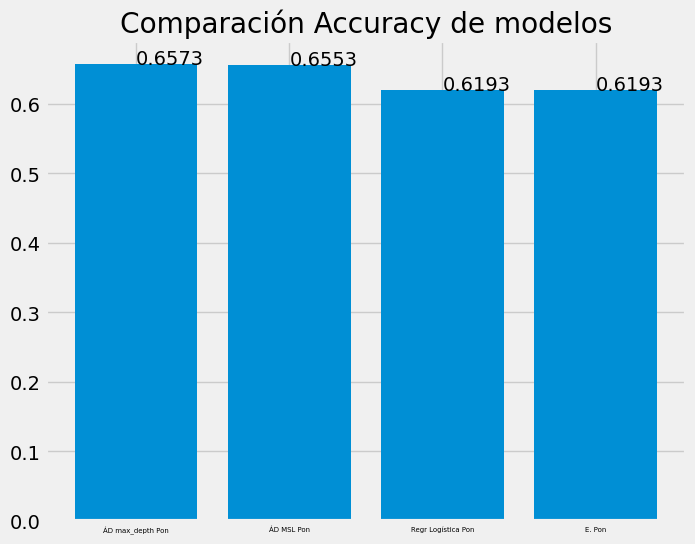

In [443]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación Accuracy de modelos")
ejeX = ['ÁD max_depth Pon','ÁD MSL Pon','Regr Logística Pon','E. Pon']
ejeY = [round(accuracy_pred_arbol_max_depth2,4),round(accuracy_pred_arbol_min_samples_leaf2,4),round(accuracy_pred_reg_log2,4),round(accuracy_score_ensamble2,4)]
ax.bar(ejeX,ejeY)
ax.tick_params(axis='x', labelsize=5)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

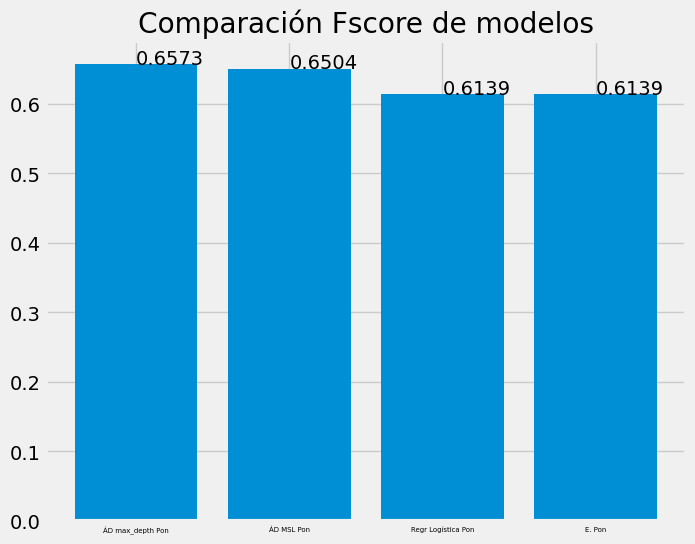

In [444]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación Fscore de modelos")
ejeX = ['ÁD max_depth Pon','ÁD MSL Pon','Regr Logística Pon','E. Pon']
ejeY = [round(f1_pred_arbol_max_depth2,4),round(f1_pred_arbol_min_samples_leaf2,4),round(f1_pred_reg_log2,4),round(f1_pred_ensamble2,4)]
ax.bar(ejeX,ejeY)
ax.tick_params(axis='x', labelsize=5)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Tanto en el Accuracy y F1-score el modelo con mejor desempeño es el ensamble de arbol de decisión con el parámetro max_depth toma un valor de 5, realizado con metodologia de ponderación el modelo con mas bajo rednimiento es la regresión Logistica

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

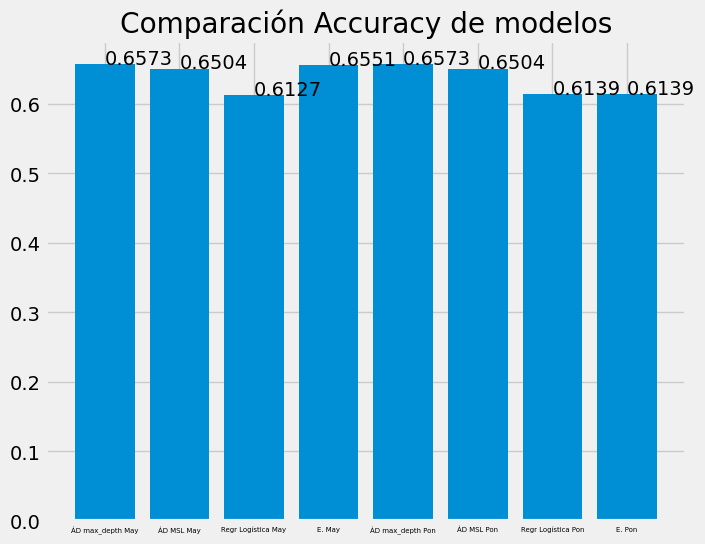

In [412]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación Accuracy de modelos")
ejeX = ['ÁD max_depth May','ÁD MSL May','Regr Logística May','E. May','ÁD max_depth Pon','ÁD MSL Pon','Regr Logística Pon','E. Pon']
ejeY = [round(accuracy_pred_arbol_max_depth,4),round(accuracy_pred_arbol_min_samples_leaf,4),round(accuracy_pred_reg_log,4),round(accuracy_score_ensamble,4),round(accuracy_pred_arbol_max_depth2,4),round(accuracy_pred_arbol_min_samples_leaf2,4),round(accuracy_pred_reg_log2,4),round(accuracy_score_ensamble2,4)]
ax.bar(ejeX,ejeY)
ax.tick_params(axis='x', labelsize=5)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()


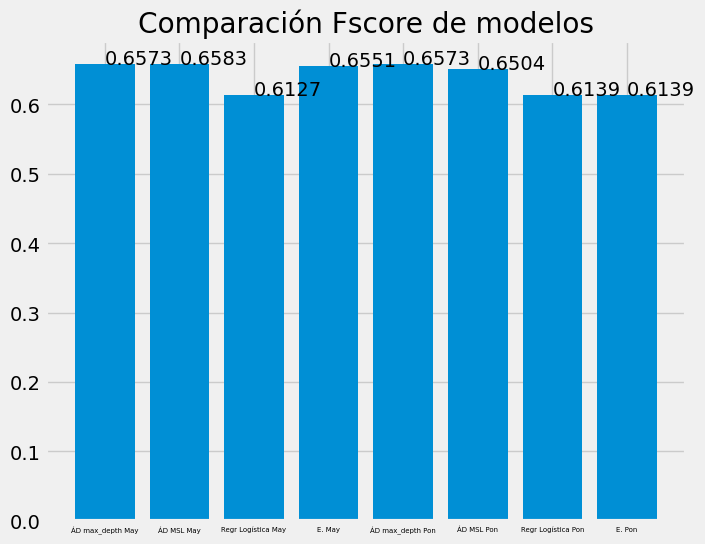

In [446]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación Fscore de modelos")
ejeX = ['ÁD max_depth May','ÁD MSL May','Regr Logística May','E. May','ÁD max_depth Pon','ÁD MSL Pon','Regr Logística Pon','E. Pon']
ejeY = [round(f1_pred_arbol_max_depth,4),round(f1_pred_arbol_min_samples_leaf,4),round(f1_pred_reg_log,4),round(f1_score_ensamble,4),round(f1_pred_arbol_max_depth2,4),round(f1_pred_arbol_min_samples_leaf2,4),round(f1_pred_reg_log2,4),round(f1_pred_ensamble2,4)]
ax.bar(ejeX,ejeY)
ax.tick_params(axis='x', labelsize=5)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Los ensambles con mejor desempeño son los ensambles de Arboles de decisión el parámetro max_depth igual a 5. Se pueden ver como **ventajas** de la votación ponderada y de votanción mayoritaria, que son relativamente faciles de implementar e interpretables. Reduciendo el impacto de modelos o árboles que esten con mal ajuste o al contrario con sobreajuste, Adicional puede tener buenos resultados en modelos como árboles de decisión donde al igual que en el ejercicio se objserva un mejor desempeño tanto en el Fscore como en el Accuracy que la aplicación de una regresión logística. 

Como **desventaja** es que puede requerir más procesamiento de datos y no asegura que siempre vaya a mejorar las metricas del modelo, como por ejemplo en los ensambles generales realizados anteriormente, las metricas tanto en la estrátegia de votación mayoritaria como votación ponderada de los modelos, no se mejoraron las métricas.